## Prosper Loans Analysis

### TOC:

- <a href="#id1">Dataset Overview.</a>
- <a href="#id2">Questions that we are trying to answer.</a>
- <a href="#id3">Extracting Data.</a>
- <a href="#id4">Assessing And Cleaning.</a>
- <a href="#id5">Visulaizations.</a>
    - <a href="#id51">Univariate Visuals:</a>
        - <a href="#id511">Loans Distribuation.</a>
        - <a href="#id512">Months' distribution.</a>
        - <a href="#id513">State Distribution.</a>
    - <a href="#id52">Bivariate Visuals:</a>
        - <a href="#id521">Relation between Income Range and Loans categories.</a>
        - <a href="#id522">Relation Between Borrowers State and Loans Categories.</a>
        - <a href="#id523">Relation Between Income Range and Prosper Score.</a>
    - <a href="#id53">Multivariate Visuals:</a>
        - <a href="#id531">Relation Between Income Range and Debt to Income Ratio And Number Of Open Credit Lines.</a>
        - <a href="#id532">Relation Between Borrowers Occupation and Dept To Income Ratio and Prosper Score.</a>
        - <a href="#id533">Relation Between Prosper Score And Number Of open Credit lines and Employment status.</a>

### Dataset Overview: <p id=id1></p>

The dataset we have is about prosper loans for a bank which describes everyhing about loans of the borrowers like theire pupose or loan category and also information about the borrower itself.

## What Questions that we will Answer? <p id=id2></p>

- What Category of loans is the most ordered?
- What is the most familiar months that the borrowers make loans?
- What state has the most number of loans?
- What is the most employment status that ordered a loan? 
- What is the relation between Open Credit lines and both Income Range and Debit to Income Ratio?
- Income ranges of the borrowers ?

## 1. Extracting Data: <p id=id3></p>

In [2]:
## Including our libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None ## Seting the maimum number of cols shown

In [3]:
## Loading the data:
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## 2. Assesing And Cleaning Data: <p id=id4></p>

### Issues Fixed In the Data set:
- Null Values Due to some errors in handling loans specially before 2009.
- In correct Data types for several Coluns.
- There are some Columns do the same job but with different naming.
- Corrcting some vlaues.

#### - Searching For Duplicates:

In [5]:
## searching for duplicates:
df.duplicated().sum()

0

We Didn't found any duplicates here.

#### - Converting Comumns to the Correct Data Types.

In [6]:
df["ClosedDate"] = pd.to_datetime(df["ClosedDate"]) # Converting ClosedDate to Date Time type

In [7]:
df["ListingCreationDate"] = pd.to_datetime(df["ListingCreationDate"]) # Converting ListingCreationDate to Date Time type

In [8]:
df["DateCreditPulled"] = pd.to_datetime(df["DateCreditPulled"]) # Converting DateCreditPulled to Date Time type

In [9]:
df["FirstRecordedCreditLine"] = pd.to_datetime(df["FirstRecordedCreditLine"]) # Converting LoanOriginationDate to Date Time type

In [10]:
df["LoanOriginationDate"] = pd.to_datetime(df["LoanOriginationDate"])# Converting LoanOriginationDate to Date Time type

In [11]:
# Cahnging th Listing number to string because we are not gonna do any mathematical operation on it
df["ListingNumber"] = df["ListingNumber"].astype(str) 

In [12]:
# Cahnging th Loan number to string because we are not gonna do any mathematical operation on it
df["LoanNumber"] = df["LoanNumber"].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113937 non-null  object        
 1   ListingNumber                        113937 non-null  object        
 2   ListingCreationDate                  113937 non-null  datetime64[ns]
 3   CreditGrade                          28953 non-null   object        
 4   Term                                 113937 non-null  int64         
 5   LoanStatus                           113937 non-null  object        
 6   ClosedDate                           55089 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113937 non-null  float64       
 9   LenderYield                          113937 non-null  float64       
 

#### - Seching for Null Values And Investiate it:

In [14]:
## Nulls at CreditGrade Col:
df["CreditGrade"].isnull().sum()

84984

In [15]:
# Exploring null values in Credit grade after 2009
print(df.loc[(df["CreditGrade"].isnull() == True) & df["ListingCreationDate"].dt.year >= 2009, :]["ListingCreationDate"])

Series([], Name: ListingCreationDate, dtype: datetime64[ns])


The null values in this column is due to these gradings are for the loans before 2009 so we will not make a change based on this columns

In [16]:
## Closed Date Nulls:
df["ClosedDate"].isnull().sum()

58848

In [17]:
## Exploring the null values in Colsed Date col
sattus = ["Cancelled", "Completed", "Chargedoff", "Defaulted"] #Loan status that have Closed Date
nat = np.datetime64('NaT') #Representing a Not-a-Time 
##selecting those who dosnot have closed dates other thatn the above status loans
df.loc[(df["LoanStatus"] != sattus[0]) & (df["LoanStatus"] != sattus[1])& (df["LoanStatus"] != sattus[2])& (df["LoanStatus"] != sattus[3]) &(df["ClosedDate"] != nat ) , :]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,0,NaN,6,102670,15000,2013-09-20,Q3 2013,36CE356043264555721F06C,563.97,2819.8500,1563.22,1256.6300,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaT,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,B,10.0,1,NM,Professional,Employed,82.0,True,False,NaN,2013-12-14 08:26:40,740.0,759.0,1973-03-01,21.0,17.0,49.0,13,1410.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,62999.0,0.39,86509.0,47.0,1.00,0.0,0.36,"$100,000+",True,8333.333333,C3D63702273952547E79520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,123257,15000,2013-12-24,Q4 2013,874A3701157341738DE458F,342.37,679.3400,351.89,327.4500,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaT,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,E,2.0,1,KS,Sales - Retail,Employed,172.0,False,False,NaN,2013-04-12 09:52:53,680.0,699.0,2000-09-29,10.0,7.0,20.0,6,214.0,0.

- The Null Values here also comes due to Current, PastDue, FinalPaymentProgress Loans status, so we cannot edit these contents.

In [18]:
## BorrowerAPR Nulls 
df["BorrowerAPR"].isnull().sum()

25

In [19]:
pd.options.display.max_rows = 25 #Making the display number of rows = 25 to show these 25 rows

In [20]:
df.loc[(df["BorrowerAPR"].isnull() == True)] # Selecting any row that don't have Borrower APR

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2543,044B3365298516680DA929B,36,2005-11-28 22:42:42.557,HR,36,Completed,2006-01-06,NaN,0.10000,0.0950,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,5BE63365249159793785758,2005-11-28 22:42:42.557,NaN,NaN,NaT,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02685,Not displayed,True,8333.333333,C1C4336516803221710615B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,99,19,4200,2005-12-12,Q4 2005,10983364491040266AF6111,99.40,4227.03,4200.0,27.03,-4.02,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
14632,E4103364750435927B6F892,67,2006-01-06 12:54:51.887,AA,36,Completed,2006-04-10,NaN,0.06500,0.0550,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,ACFB3365095848727895936,2006-01-06 12:54:51.887,NaN,NaN,NaT,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09031,Not displayed,True,4166.666667,191C3365353954529711DE0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,98,24,2620,2006-01-10,Q1 2006,12C53364471219226F478E8,80.30,2657.72,2620.0,37.72,-2.59,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,5
25166,B3083364738592238DBDA63,6,2005-11-15 16:06:47.457,AA,36,Completed,2005-11-29,NaN,0.04350,0.0385,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,NaN,2005-11-15 16:06:47.457,NaN,NaN,NaT,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04120,Not displayed,True,9166.666667,C29A3366376042420E5D6F4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,100,5,1000,2005-11-23,Q4 2005,92263365124033374675E8D,29.68,1000.72,1000.0,0.72,-0.42,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,3
25330,B6C33364979883097BBCD77,39,2005-11-29 13:29:16.810,AA,36,Completed,2006-03-21,NaN,0.06395,0.0552,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,BA973366260114148BF757A,2005-11-29 09:42:00.007,NaN,NaN,NaT,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07707,Not displayed,True,7083.333333,A5A53366276781033D5C4FF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,99,18,1500,2005-12-08,Q4 2005,D3213365072473957A40CF8,45.90,1519.59,1500.0,19.59,-1.30,0.0000,0.0,0.0,0.0,1.000,0,0,0.0,4
29773,3480336511078238810A782,21,2005-11-18 14:48:19.753,AA,36,Completed,2008-06-05,NaN,0.06000,0.0550,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,False,94E9336577086235891524E,2005-11-18 14:48:19.753,NaN,NaN,NaT,NaN,NaN,NaN,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01923,Not displayed,True,8333.333333,44DA3365766842096917FF8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

- We Found here that all these values are encloded between the time period from 9/11/2005 to 6/1/2006 (Arround two months).
- All terms are within 36 months
- it sounds that there was an error in this period and that appears in the other columns which most of them are Null values

**Action**:
- We are going to drop these rows because it's not proper to make calculations on it

In [21]:
df.dropna(subset = ["BorrowerAPR"],inplace = True) ## Droping all null vlaues in the col Borrower APR

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113912 non-null  object        
 1   ListingNumber                        113912 non-null  object        
 2   ListingCreationDate                  113912 non-null  datetime64[ns]
 3   CreditGrade                          28928 non-null   object        
 4   Term                                 113912 non-null  int64         
 5   LoanStatus                           113912 non-null  object        
 6   ClosedDate                           55064 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113912 non-null  float64       
 9   LenderYield                          113912 non-null  float64       
 

**Quality isuue**
- ProsperRating Numeric and Alphabetical representation can be made in one column whith either numeric or alpha, we choose to represent it with numeric representation

**Action:**
- We Wil drop the ProsperRating (Alpha) column and rename the ProsperRating (Numeric) to only ProsperRating

In [23]:
#Dropping the Col of ProsperRating (Alpha) because we chose to represent thin in numeric values
df.drop(axis = 1, labels = ["ProsperRating (Alpha)"], inplace = True) 

In [24]:
# Ranamin the numeric values column of Prosper Rating
df.rename(columns = {"ProsperRating (numeric)": "ProsperRating"}, inplace =True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113912 entries, 0 to 113936
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   ListingKey                           113912 non-null  object        
 1   ListingNumber                        113912 non-null  object        
 2   ListingCreationDate                  113912 non-null  datetime64[ns]
 3   CreditGrade                          28928 non-null   object        
 4   Term                                 113912 non-null  int64         
 5   LoanStatus                           113912 non-null  object        
 6   ClosedDate                           55064 non-null   datetime64[ns]
 7   BorrowerAPR                          113912 non-null  float64       
 8   BorrowerRate                         113912 non-null  float64       
 9   LenderYield                          113912 non-null  float64       
 

**Listing Category:**
- Listing category is preferred to be a categrorical not numerical value to be more comprehensive.

**Acion:**
- We Will change the values according to the dataset defenetion
- We Will rename it to Only Prosper Rating.

Data Set Definition:
0 - Not Available, 1 - Debt Consolidation2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

In [26]:
#Converting Number representation of Listing Categoris to Categorical data for better representaion
#Ctegory Dictionary based on the Data definition
cat_dict = {0: "Not Available",1 : "Debt Consolidation", 2 :"Home Improvement", 3 : "Business",
            4: "Personal Loan" ,5: "Student Use",6: "Auto",7: "Other",8 : "Baby&Adoption",
            9: "Boat",10: "Cosmetic Procedure",11: "Engagement Ring",12: "Green Loans",
            13: "Household Expenses",14: "Large Purchases",15: "Medical/Dental",16: "Motorcycle",
            17: "RV",18: "Taxes",19: "Vacation",20: "Wedding Loans"} 
new_cat = [] # Initializing empty list to hold the converted Categories
# Fill the empty list with corresponding Categprro for each row
for i in df["ListingCategory (numeric)"]:
    new_cat.append(cat_dict[i])
# Equalizing the old colum values with tha new one.
df["ListingCategory (numeric)"] = new_cat    
df["ListingCategory (numeric)"]

0              Not Available
1           Home Improvement
2              Not Available
3                 Motorcycle
4           Home Improvement
                 ...        
113932    Debt Consolidation
113933                 Other
113934    Debt Consolidation
113935      Home Improvement
113936    Debt Consolidation
Name: ListingCategory (numeric), Length: 113912, dtype: object

In [27]:
#Renaming the new category column
df.rename(columns = {"ListingCategory (numeric)" : "ListingCategory"}, inplace= True)

In [28]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,Not Available,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,Home Improvement,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,Not Available,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,Motorcycle,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,Home Improvement,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,

In [29]:
## Nulls in the borrower employment status:
print(df["Occupation"].isnull().sum() ,df["EmploymentStatus"].isnull().sum(), df["EmploymentStatusDuration"].isnull().sum())

3563 2230 7600


**Note:**
- here we found that there is many borrowers that occupy some position but in the same time the Employment status is unKnown for us, so we will inveistigate it.

In [30]:
df["EmploymentStatus"].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

**Note:**
- Here we found that there is category of employment status called Not available and not employed we can consider this as null values because we don't know the status of the employment, so these are different values for the same meaning, we have to investigate more.

In [31]:
#Investigating in the Occupation col.
print( df["Occupation"].value_counts())
print( df["Occupation"].isnull().sum())

Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Community College       28
Judge                             22
Student - Technical School        16
Name: Occupation, Length: 67, dtype: int64
3563


In [32]:
#checking if there is any row that hasn't employment status an occupy some position
df.loc[(df["EmploymentStatus"].isnull()== True ) & (df["Occupation"].isnull() != True)]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


**Note:**
- here We found that all borrower who don't have an employment status does not occupy any positions and that sounds logical

In [33]:
#checking if there is any row that has an employment status an doesnot occupy some position
df.loc[(df["EmploymentStatus"].isnull()!= True ) & (df["Occupation"].isnull() == True)]["EmploymentStatus"].value_counts()

Other        1332
Full-time       1
Name: EmploymentStatus, dtype: int64

**Note:** 
- All the Borrowes that not occupy any postions have an "Other" Emplyment status
- one borrower that was working as a fultime but at the same time he didn't occupy any postitions and that is weird.

**Action:**
- so we are going to drop this row.

In [34]:
#dropping the full time row that does not have occupation
df.loc[(df["EmploymentStatus"] == "Full-time" ) & (df["Occupation"].isnull() == True)]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
91583,5FDB359776557585836A751,1062697,2013-12-27 20:37:20.893,NaN,36,Current,NaT,0.1899,0.1535,0.1435,0.13507,0.0599,0.07517,5.0,6.0,Debt Consolidation,TN,NaN,Full-time,13.0,True,False,NaN,2013-12-27 20:37:23,640.0,659.0,2001-03-12,9.0,8.0,17.0,6,300.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,6558.0,0.81,1042.0,17.0,0.76,1.0,0.2,"$50,000-74,999",True,5000.0,05A937032516909747662DD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,124577,10000,2014-01-03,Q1 2014,DA4F370190128664644C78E,348.37,696.74,451.18,245.56,-15.99,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [35]:
df.drop(axis = 0, index= [91583], inplace=True)

In [36]:
#Check
df.loc[(df["EmploymentStatus"] == "Full-time" ) & (df["Occupation"].isnull() == True)]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [37]:
df["EmploymentStatus"].value_counts()

Employed         67322
Full-time        26354
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

**Note:**
- We found another representation of those who does not working as "Not Employed" so we are going to investigate it too.

In [38]:
#Check for those who has not employed status and doenot occupy any position
df.loc[(df["EmploymentStatus"] == "Not employed" ) & (df["Occupation"].isnull() == True)]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [39]:
#investigating those who has Not Employed status 
df.loc[(df["EmploymentStatus"] == "Not employed" )]["Occupation"].value_counts()

Other                                 793
Student - College Graduate Student      9
Homemaker                               9
Student - College Senior                3
Student - College Junior                3
Student - Community College             2
Skilled Labor                           2
Student - College Sophomore             2
Retail Management                       2
Student - College Freshman              1
Sales - Commission                      1
Nurse's Aide                            1
Analyst                                 1
Student - Technical School              1
Psychologist                            1
Sales - Retail                          1
Waiter/Waitress                         1
Teacher's Aide                          1
Professional                            1
Name: Occupation, dtype: int64

In [40]:
## Nulls at credit lines:
df["OpenCreditLines"].isnull().sum()

7579

In [41]:
#check if there is a null values in the number of credit lines after 2009
df.loc[df["OpenCreditLines"].isnull() & df["ListingCreationDate"].dt.year >= 2009]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


- From these records we see that all these record are before 2009, and these don't have a complete information about the loan

**Action:**
- we are going to drop these rows

In [42]:
#getting the ids of these rows
ids = df[df["OpenCreditLines"].isnull()].index
ids

Int64Index([     2,     17,     39,     42,     63,     76,     90,     92,
               122,    128,
            ...
            113735, 113736, 113768, 113797, 113819, 113825, 113848, 113902,
            113914, 113926],
           dtype='int64', length=7579)

In [43]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,Not Available,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,Home Improvement,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,Not Available,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060,480.0,499.0,2002-07-27,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,Motorcycle,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,Home Improvement,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,

In [44]:
#dropping them
df.drop(axis = 0, index = ids, inplace = True)

In [45]:
#check if there is another null values
df[df["OpenCreditLines"].isnull()]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors


In [46]:
## Total inquiries:
df["TotalInquiries"].isnull().sum()

0

In [47]:
## Puplic records in 10 Years:
df["PublicRecordsLast10Years"].isnull().sum()

20

In [48]:
# Getting the null values in the Public record last 10 years col
ids = df[df["PublicRecordsLast10Years"].isnull()].index

In [49]:
# Dropping them
df.drop(axis = 0, index =ids, inplace = True)

In [50]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,Not Available,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780,640.0,659.0,2001-10-11,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12,Q3 2007,1F3E3376408759268057EDA,330.43,11396.1400,9425.00,1971.1400,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,7.0,Home Improvement,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14.000,680.0,699.0,1996-03-18,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03,Q1 2014,1D13370546739025387B2F4,318.93,0.0000,0.00,0.0000,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,9.0,Motorcycle,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32.000,800.0,819.0,1983-02-28,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,4.0,Home Improvement,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44.000,680.0,699.0,2004-02-20,19.0,19.0,49.0,6,220.0,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.90,NaN,0,NaN,6,102670,15000,2013-09-20,Q3 2013,36CE356043264555721F06C,563.97,2819.8500,1563.22,1256.6300,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaT,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,10.0,Debt Consolidation,NM,Professional,Employed,82.0,True,False,NaN,2013-12-14 08:26:40.000,740.0,759.0,1973-03-0

In [51]:
## Income Range:
df["IncomeRange"].isnull().sum()

0

In [52]:
#getting the time of incoe range
df["IncomeRange"].dtype

dtype('O')

In [53]:
df["DebtToIncomeRatio"].isnull().sum()

8410

In [54]:
## Debt To Income Ratio:
df[df["DebtToIncomeRatio"].isnull()]


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
40,10A43601079743929992413,1167746,2014-01-27 12:02:57.523,NaN,60,Current,NaT,0.19630,0.1725,0.1625,0.15163,0.0724,0.07923,4.0,4.0,Debt Consolidation,WA,Other,Self-employed,276.0,False,False,NaN,2014-01-25 10:47:25.000,680.0,699.0,1985-12-20,10.0,9.0,28.0,10,1233.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,61284.0,0.46,69166.0,28.0,1.00,2.0,NaN,"$100,000+",False,12750.000000,91A33705770133108E299C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,129161,15000,2014-01-29,Q1 2014,ACFF370458072043753CE79,374.81,374.8100,162.14,212.6700,-12.33,0.00,0.00,0.00,0.0,1.0,0,0,0.0,3
69,0F37360159310530849DA23,1162592,2014-01-25 12:07:54.537,NaN,60,Current,NaT,0.13636,0.1139,0.1039,0.09989,0.0349,0.06499,6.0,11.0,Debt Consolidation,IL,Investor,Self-employed,12.0,True,True,NaN,2014-01-25 11:51:41.000,700.0,719.0,1995-08-01,5.0,5.0,21.0,3,373.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19961.0,0.79,5039.0,21.0,1.00,0.0,NaN,"$25,000-49,999",False,2700.000000,B08137048491184083D747A,3.0,16.0,16.0,0.0,0.0,7861.0,0.02,NaN,0,NaN,2,128889,9000,2014-01-29,Q1 2014,87D0340317005703964722E,197.44,194.6315,115.99,78.6415,-7.15,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
78,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157,A,36,Chargedoff,2009-04-09,0.18454,0.1700,0.1600,NaN,NaN,NaN,NaN,NaN,Business,CA,Realtor,Full-time,68.0,True,False,NaN,2008-06-29 23:13:04.860,720.0,739.0,1995-11-29,14.0,14.0,26.0,9,962.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,33572.0,0.73,9355.0,24.0,1.00,1.0,NaN,$0,False,0.000000,B8483424568930207C77772,1.0,6.0,6.0,0.0,0.0,7750.0,6725.84,0.0,1918,9.0,68,33852,4800,2008-07-08,Q3 2008,D77734052911579724BCDD5,171.13,684.5200,418.38,266.1400,-15.66,0.00,4381.62,4381.62,0.0,1.0,0,0,0.0,115
100,0F67356860455769574096F,704916,2013-01-25 11:48:26.040,NaN,36,Chargedoff,2013-08-30,0.35356,0.3134,0.3034,0.27600,0.1575,0.11850,1.0,3.0,Household Expenses,CA,Other,Not employed,12.0,False,False,NaN,2013-01-11 12:10:13.000,720.0,739.0,2000-09-10,3.0,3.0,10.0,3,56.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5641.0,0.22,19359.0,4.0,1.00,1.0,NaN,Not employed,False,0.000000,9D203674230576864DAB261,1.0,11.0,7.0,4.0,0.0,5000.0,3802.10,-47.0,314,7.0,14,82947,4000,2013-01-30,Q1 2013,CEE83539008163122ED9B62,172.76,345.5200,144.77,200.7500,-6.41,0.00,3855.23,3855.23,0.0,1.0,0,0,0.0,73
103,0F843543787869030F017F8,579737,2012-04-17 11:58:52.270,NaN,36,Chargedoff,2013-03-22,0.26681,0.2287,0.2187,0.21340,0.0990,0.11440,3.0,2.0,Business,CO,Truck Driver,Self-employed,29.0,True,False,NaN,2012-04-1

In [55]:
# Check if there is an income verfied borrowers but with Debt to income ratio
df.loc[df["DebtToIncomeRatio"].isnull() & (df["IncomeVerifiable"] == False)]

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating,ProsperScore,ListingCategory,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
40,10A43601079743929992413,1167746,2014-01-27 12:02:57.523,NaN,60,Current,NaT,0.19630,0.1725,0.1625,0.15163,0.0724,0.07923,4.0,4.0,Debt Consolidation,WA,Other,Self-employed,276.0,False,False,NaN,2014-01-25 10:47:25.000,680.0,699.0,1985-12-20,10.0,9.0,28.0,10,1233.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,61284.0,0.46,69166.0,28.0,1.00,2.0,NaN,"$100,000+",False,12750.000000,91A33705770133108E299C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,2,129161,15000,2014-01-29,Q1 2014,ACFF370458072043753CE79,374.81,374.8100,162.14,212.6700,-12.33,0.00,0.00,0.00,0.0,1.0,0,0,0.0,3
69,0F37360159310530849DA23,1162592,2014-01-25 12:07:54.537,NaN,60,Current,NaT,0.13636,0.1139,0.1039,0.09989,0.0349,0.06499,6.0,11.0,Debt Consolidation,IL,Investor,Self-employed,12.0,True,True,NaN,2014-01-25 11:51:41.000,700.0,719.0,1995-08-01,5.0,5.0,21.0,3,373.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,19961.0,0.79,5039.0,21.0,1.00,0.0,NaN,"$25,000-49,999",False,2700.000000,B08137048491184083D747A,3.0,16.0,16.0,0.0,0.0,7861.0,0.02,NaN,0,NaN,2,128889,9000,2014-01-29,Q1 2014,87D0340317005703964722E,197.44,194.6315,115.99,78.6415,-7.15,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
78,0DFE3425061927556BB8A75,359657,2008-06-29 23:23:40.157,A,36,Chargedoff,2009-04-09,0.18454,0.1700,0.1600,NaN,NaN,NaN,NaN,NaN,Business,CA,Realtor,Full-time,68.0,True,False,NaN,2008-06-29 23:13:04.860,720.0,739.0,1995-11-29,14.0,14.0,26.0,9,962.0,4.0,11.0,0.0,0.0,0.0,0.0,0.0,33572.0,0.73,9355.0,24.0,1.00,1.0,NaN,$0,False,0.000000,B8483424568930207C77772,1.0,6.0,6.0,0.0,0.0,7750.0,6725.84,0.0,1918,9.0,68,33852,4800,2008-07-08,Q3 2008,D77734052911579724BCDD5,171.13,684.5200,418.38,266.1400,-15.66,0.00,4381.62,4381.62,0.0,1.0,0,0,0.0,115
100,0F67356860455769574096F,704916,2013-01-25 11:48:26.040,NaN,36,Chargedoff,2013-08-30,0.35356,0.3134,0.3034,0.27600,0.1575,0.11850,1.0,3.0,Household Expenses,CA,Other,Not employed,12.0,False,False,NaN,2013-01-11 12:10:13.000,720.0,739.0,2000-09-10,3.0,3.0,10.0,3,56.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,5641.0,0.22,19359.0,4.0,1.00,1.0,NaN,Not employed,False,0.000000,9D203674230576864DAB261,1.0,11.0,7.0,4.0,0.0,5000.0,3802.10,-47.0,314,7.0,14,82947,4000,2013-01-30,Q1 2013,CEE83539008163122ED9B62,172.76,345.5200,144.77,200.7500,-6.41,0.00,3855.23,3855.23,0.0,1.0,0,0,0.0,73
103,0F843543787869030F017F8,579737,2012-04-17 11:58:52.270,NaN,36,Chargedoff,2013-03-22,0.26681,0.2287,0.2187,0.21340,0.0990,0.11440,3.0,2.0,Business,CO,Truck Driver,Self-employed,29.0,True,False,NaN,2012-04-1

- There is a relation between the debt to income ratio and the borrower had verfied his income

## Saving to a CSV File: 

In [56]:
df.to_csv("Modified_data.csv", index=False)

## 3. Visualizations: <p id=id5></p>

### 3.1 Univariate Visuals: <p id=id51></p>

### 3.1.1 Most Ordered Loans: <p id=id511></p>


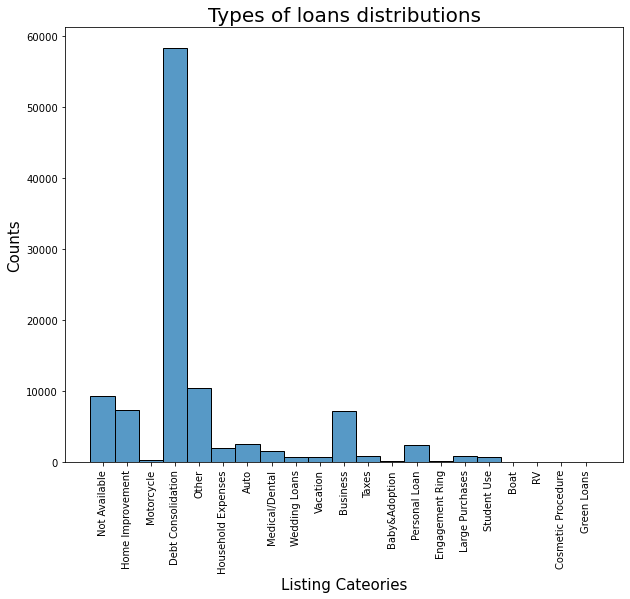

In [66]:
# Plotting distribution of Listing Categories
plt.figure(figsize = (10,8)) #setting figure size
plt.title("Types of loans distributions", fontsize = 20) #setting figure title
plt.xlabel("Listing Cateories", fontsize = 15)
plt.ylabel("Counts", fontsize = 15)

#Plotting
sns.histplot(df["ListingCategory"]);
plt.xticks(rotation=90)
plt.savefig("loanscategories.png") #saving it to png image

- The most loans category is debt consolidation with a percentage more that tha half of the total loans.
- We have to be more specific about the loans' purposed because the is arround 20% (9.9 for "Other" Category and 8.8 for "Not Available") and this me it hard to know their real needs so we can make a useful services for them. 

### 3.1.2 Months' loans Distributions:<p id=id512></p>

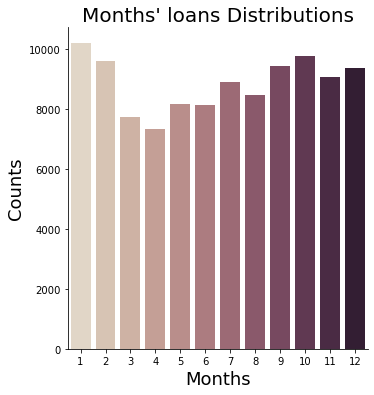

In [67]:
#Plotting Months distribution
df["month"]  = df["ListingCreationDate"].dt.month ## Getting the months of the creation date
sns.catplot(x= "month", kind = 'count', palette="ch:.25", data = df, legend=True, legend_out=True );
plt.title("Months' loans Distributions", fontsize = 20)
plt.xlabel("Months", fontsize = 18)
plt.ylabel("Counts", fontsize = 18)
plt.savefig("Months Distributions.png")

- Months from September to February is likely to have more loans specailly the month of Jsn, and this can be reasoned by the christmas.
- In Order to Maximize our profit we have to make it moe easy for the borrowers to have loans in the time of feasts, and also to make some sspecial offers in the mid year months, to atttract more borrowers.

### 3.1.3 State Distibutions for the borrowers: <p id=id513></p>

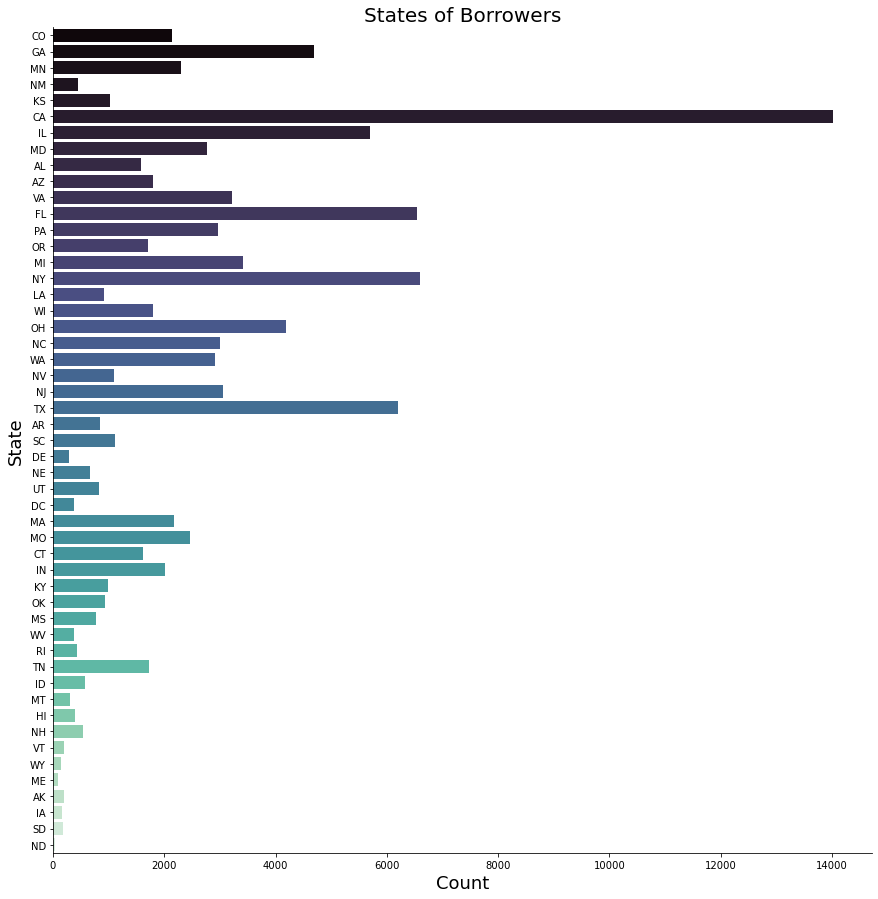

In [95]:
sns.catplot(y= "BorrowerState",height = 12 ,kind = 'count',  palette="mako", data = df, legend=True, legend_out=True ).set(title='States of Borrowers');
plt.title("States of Borrowers", fontsize = 20)
plt.ylabel("State", fontsize = 18)
plt.xlabel("Count", fontsize = 18)
plt.savefig("Borrowers' states Distributions.png")


- We have found that California, New York, Florida and Texas are the most common cities to have loans.
- We have to make it more easy for other states to have loans for example by making ATMs Available more there specialy for the Debt Consolidation loans.

### 3.2 Bivariate Visuals: <p id=id52></p>

## 3.2.1 Relation Between Income Range and Ordering loans: <p id=id521></p>

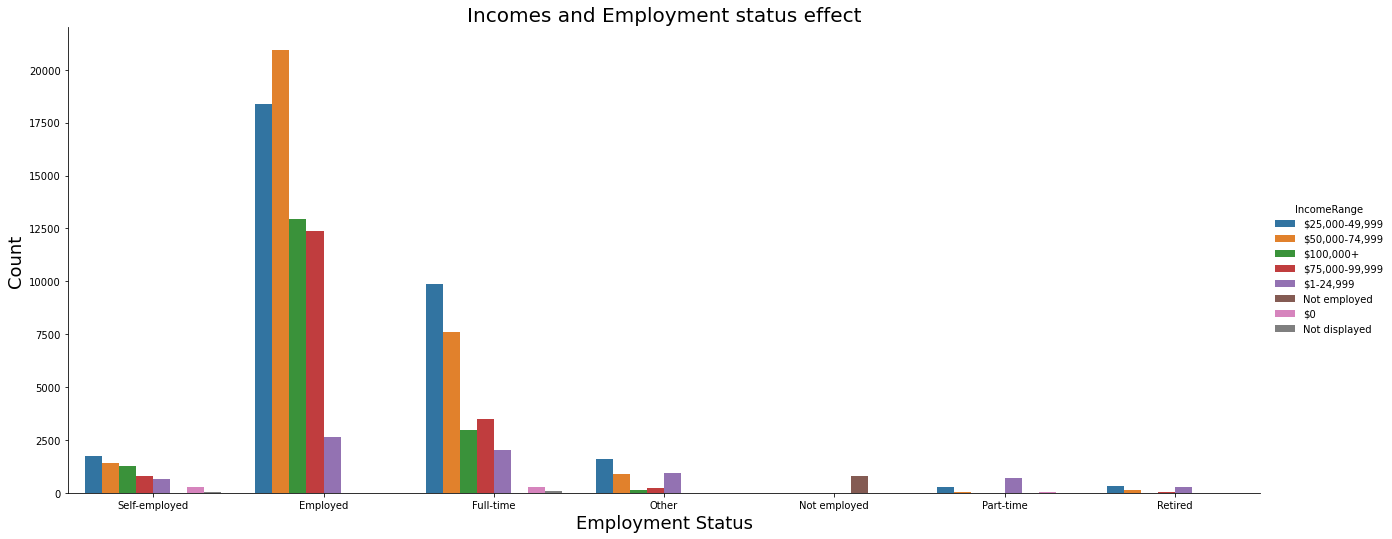

In [61]:
sns.catplot(x="EmploymentStatus", hue="IncomeRange", kind='count', aspect=2.5,height=7, data=df);
plt.title("Incomes and Employment status effect", fontsize = 20)
plt.ylabel("Count",fontsize = 18)
plt.xlabel("Employment Status",fontsize = 18)
plt.savefig("EMPstswithincome.png")

- Almost here, whatever the employement status, those whose income less than 75K are more likely to have loans

### 3.2.2: Relation between Borrowers State and category of loans:<p id=id522></p>

Text(0.5, 1.0, 'Effect of Borrower adress on the type of debt')

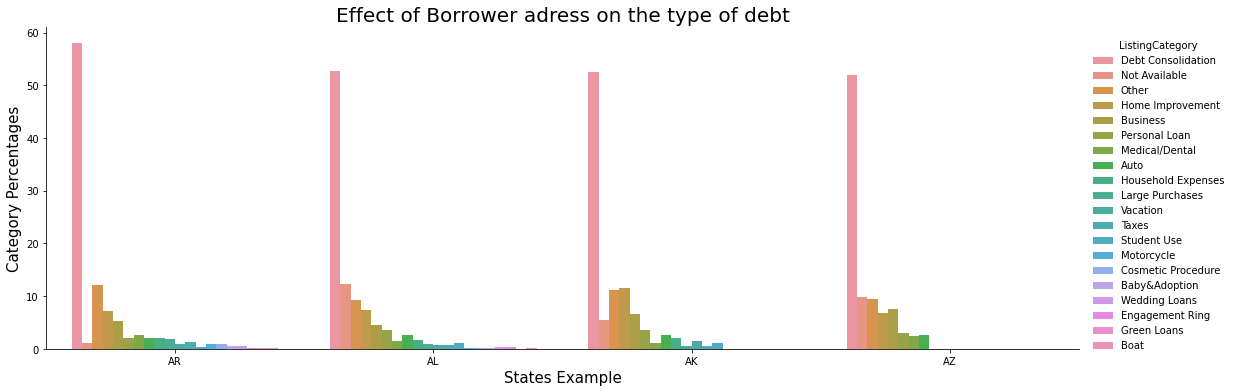

In [62]:
new_df = df.groupby(['BorrowerState'])['ListingCategory'].value_counts(normalize = True).mul(100).rename("Percentages")[:60].reset_index().sort_values("Percentages", ascending = False)
sns.catplot(x="BorrowerState" ,y="Percentages", hue = "ListingCategory", data=new_df, kind="bar", aspect=3 );
plt.xlabel("States Example", fontsize = 15)
plt.ylabel("Category Percentages", fontsize = 15)
plt.title("Effect of Borrower adress on the type of debt", fontsize = 20)

- As we Can see that the State Dosn't have a notable effect on the category of the loans, because the debt Cosolidation is always the most ordered loans.

### 3.2.3 Effect of the Income Range on Prosper score: <p id=id523></p>

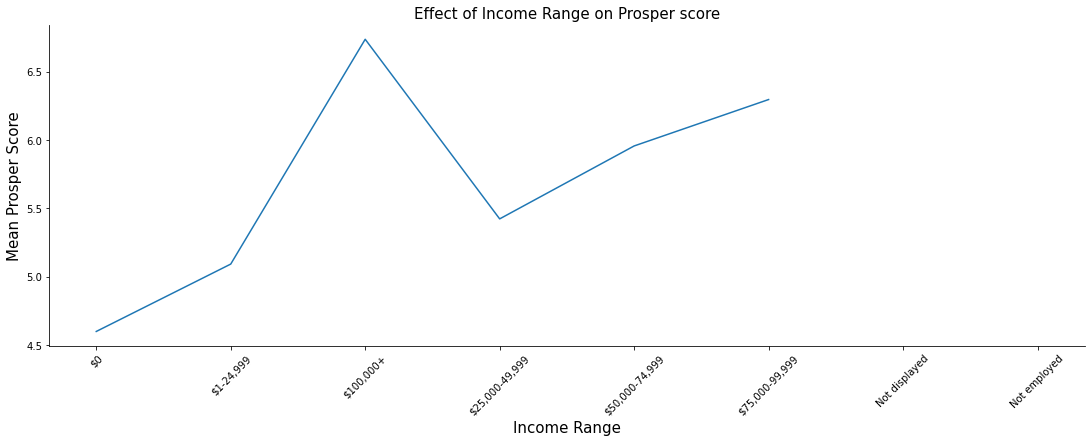

In [63]:
new_df = df.groupby(["IncomeRange"])["ProsperScore"].mean().rename("MeanScore").reset_index()
sns.relplot(x="IncomeRange", y="MeanScore", aspect=3, data=new_df, kind="line");
plt.xlabel("Income Range", fontsize = 15)
plt.ylabel("Mean Prosper Score", fontsize = 15)
plt.title("Effect of Income Range on Prosper score", fontsize = 15)
plt.xticks(rotation=45);


- It's obvious that the higher paid person the higher prosper score
- No prosper score for Not Employed and Not displayed Income due to lack of Income information

## 3.3 Multivariate Visuals: <p id=id53></p>

### 3.3.1 Relation Between The Income Range and both Debt to income ratio and Open Credit ines: <p id=id531></p>

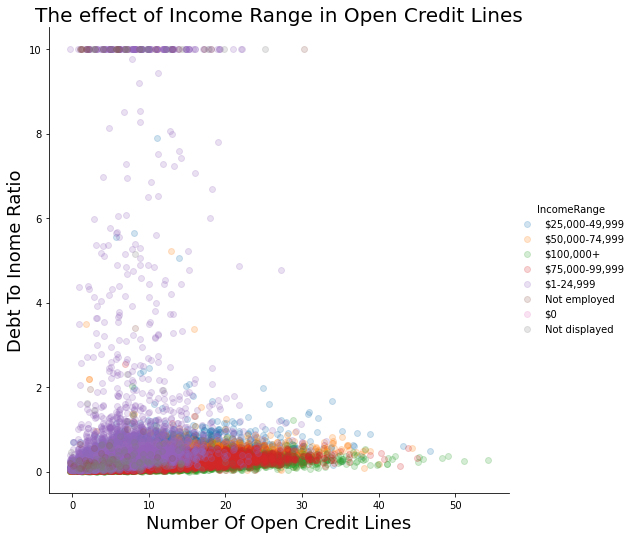

In [82]:
sns.lmplot(x="OpenCreditLines", y="DebtToIncomeRatio", hue="IncomeRange"
           , height=7, data=df,
           x_jitter = 0.3, fit_reg= False, scatter_kws = {"alpha" : 0.2});
plt.title("The effect of Income Range in Open Credit Lines", fontsize= 20)
plt.ylabel("Debt To Inome Ratio",fontsize = 18)
plt.xlabel("Number Of Open Credit Lines",fontsize = 18)

plt.savefig("RffOfIncoeRange.png")

- As it's Obviuos that Those Who have more Income Ranges Are more Likely to have more Open Crediti lines and has less Debt to Income Ratios.
- We have to be more precise about those who aer not employed when giving them a loans, because it appears that they have more debt to income ratios.

### 3.3.2 Relation Between Occupation and Debt to Income Ratio and Prosper score: <p id=id532></p>

Text(14.935680183531737, 0.5, 'Debt To Income Ratio')

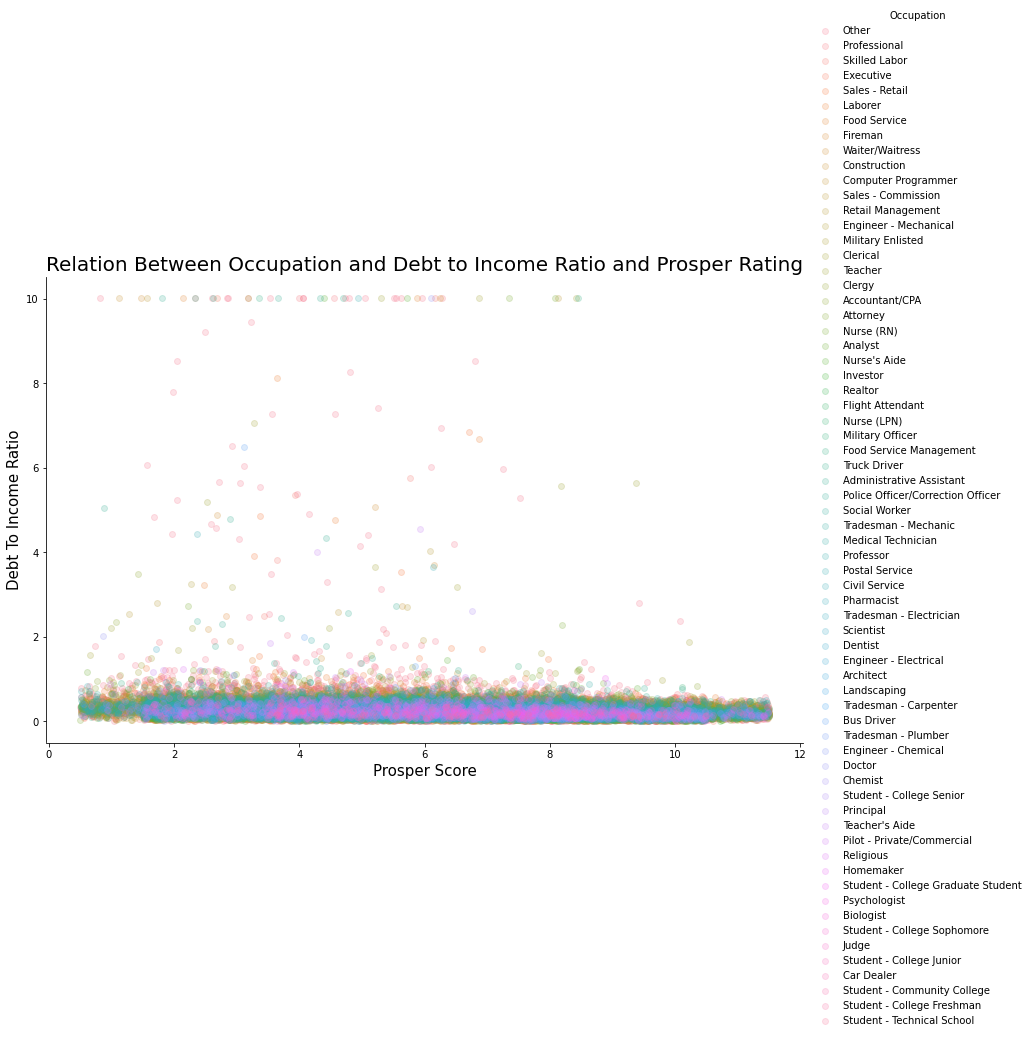

In [92]:

sns.lmplot(x="ProsperScore", y='DebtToIncomeRatio', hue="Occupation", height= 7, aspect= 1.6, data=df, 
          x_jitter = 0.5, fit_reg= False, scatter_kws = {"alpha" : 0.2}
          , legend_out = True);
plt.title("Relation Between Occupation and Debt to Income Ratio and Prosper Rating", fontsize = 20)
plt.xlabel("Prosper Score", fontsize = 15)
plt.ylabel("Debt To Income Ratio", fontsize = 15)

- We cannot find relation between the Ocupation and any of the to other variables.
- There is some kind of relatioship between the Debt to Income ratio and prosper score, the higher prosper score requires a low debt to Income Ratio.

### 3.3.3 Relation Between Employment Status and Open Credit Lines and Prosper Score: <p id=id533></p>

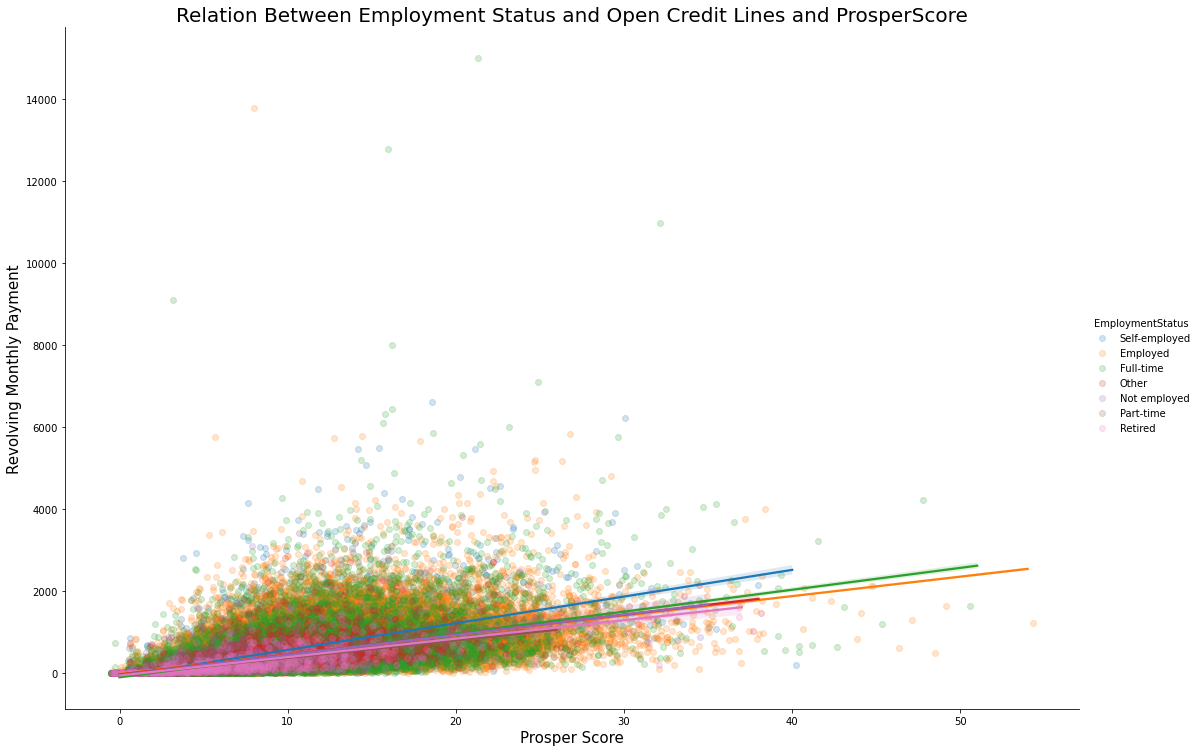

In [96]:
sns.lmplot(x="OpenCreditLines", y='OpenRevolvingMonthlyPayment', hue="EmploymentStatus", aspect = 1.5,height= 10, data=df,
          x_jitter = 0.5, fit_reg= True, scatter_kws = {"alpha" : 0.2} ,legend_out = True);
plt.title("Relation Between Employment Status and Open Credit Lines and ProsperScore", fontsize = 20)
plt.xlabel("Prosper Score", fontsize = 15)
plt.ylabel("Revolving Monthly Payment", fontsize = 15)
plt.savefig("EmpStatwithRevolv.png")

- there is a positive correlation between the Number of Open Credit Lines and the open revolving monthly payment.
- thoses who are self emplyed have more monthlypayment but have less number of open credit lines in genral.